In [2]:
import pandas as pd
import numpy as np
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("u_data", sep='\t')
df.head()

,196,242,3,881250949
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [5]:
df.shape

(99999, 4)

In [6]:
column_name = ['user_id','item_id','rating','timestamp']
df = pd.read_csv("u_data", sep='\t',names = column_name)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
df['user_id'].nunique()

943

In [8]:
df['item_id'].nunique()

1682

In [9]:
movie_titles = pd.read_csv('u.item',sep='\|',header = None)
movie_titles = movie_titles[[0,1]]
movie_titles.columns = ['item_id','movie_title']
movie_titles.head()

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
df = pd.merge(df,movie_titles,on='item_id')

df.tail()

,user_id,item_id,rating,timestamp,movie_title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df.groupby('movie_title').mean()['rating'].sort_values(ascending=False).head()
#df1.head()


movie_title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [13]:
#no of users watched a particular movie
df.groupby('movie_title').count().head()


,user_id,item_id,rating,timestamp
movie_title,,,,
'Til There Was You (1997),9,9,9,9
1-900 (1994),5,5,5,5
101 Dalmatians (1996),109,109,109,109
12 Angry Men (1957),125,125,125,125
187 (1997),41,41,41,41


In [14]:
#most watched movie
df.groupby('movie_title').count()['rating'].sort_values(ascending=False).head()

movie_title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [15]:
ratings = pd.DataFrame(df.groupby('movie_title').mean()['rating'])

In [16]:
ratings.head()

,rating
movie_title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [17]:
ratings['no of rating'] = pd.DataFrame(df.groupby('movie_title').count()['rating'])


In [18]:
ratings

,rating,no of rating
movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [19]:
ratings.sort_values(by = 'rating',ascending=False)

,rating,no of rating
movie_title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


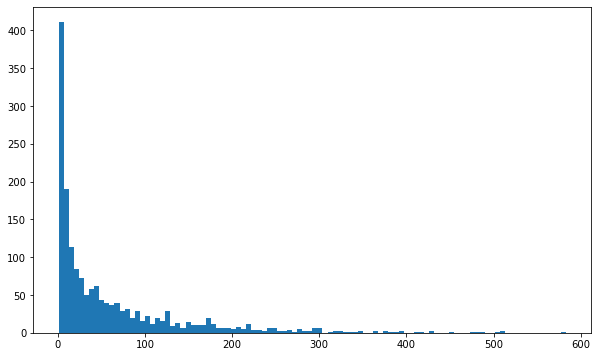

In [20]:
plt.figure(figsize=(10,6))
plt.hist(ratings['no of rating'], bins = 100)
plt.show()

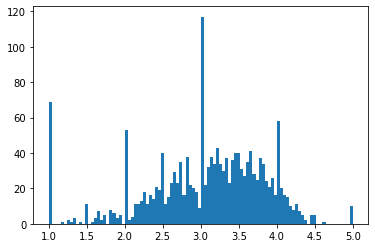

In [21]:
plt.hist(ratings['rating'], bins = 100)
plt.show()

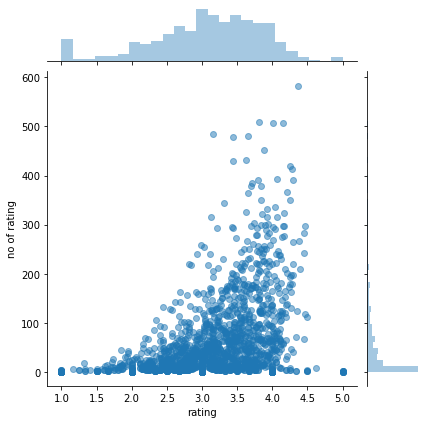

In [22]:
sns.jointplot(x='rating',y='no of rating',data=ratings,alpha =0.5)

## Creating Movie Recommendation

In [23]:
df.head()

,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [24]:
movie_matrix = df.pivot_table(index='user_id',columns='movie_title',values = 'rating')

In [25]:
movie_matrix

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
Kolya_user_rating = movie_matrix['Kolya (1996)']
Kolya_user_rating.head()

user_id
1    5.0
2    5.0
3    NaN
4    NaN
5    NaN
Name: Kolya (1996), dtype: float64

In [27]:
StarWars_user_rating = movie_matrix['Star Wars (1977)']
StarWars_user_rating.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [28]:
similar_to_StarWars = movie_matrix.corrwith(StarWars_user_rating)

In [29]:
starwars_corr = pd.DataFrame(similar_to_StarWars,columns=['Corelation'])
starwars_corr

,Corelation
movie_title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [30]:
#drop nan value
starwars_corr.dropna(inplace = True)

In [31]:
starwars_corr

,Corelation
movie_title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [32]:
starwars_corr.sort_values('Corelation',ascending = False).head(7)

,Corelation
movie_title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0


In [33]:
starwars_corr = starwars_corr.join(ratings['no of rating'])
starwars_corr

,Corelation,no of rating
movie_title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [34]:
starwars_corr[starwars_corr['no of rating']>100].sort_values('Corelation',ascending = False)

,Corelation,no of rating
movie_title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


## Prediction

In [38]:
def recommend_movie(movie_name):
    movie_user_rating = movie_matrix[movie_name]
    similar_to_movie = movie_matrix.corrwith(movie_user_rating)
    
    movie_corr = pd.DataFrame(similar_to_movie,columns=['Corelation'])
    movie_corr.dropna(inplace = True)
    
    
    movie_corr = movie_corr.join(ratings['no of rating'])
    predictions = movie_corr[movie_corr['no of rating']>100].sort_values('Corelation',ascending = False)
    return predictions



In [41]:
recommendation = recommend_movie('Empire Strikes Back, The (1980)')
recommendation.head(10)

,Corelation,no of rating
movie_title,,
"Empire Strikes Back, The (1980)",1.000000,367
Star Wars (1977),0.747981,583
Return of the Jedi (1983),0.721229,507
Raiders of the Lost Ark (1981),0.538659,420
"Philadelphia Story, The (1940)",0.482151,104
"Frighteners, The (1996)",0.442761,115
Con Air (1997),0.399200,137
Donnie Brasco (1997),0.371506,147
"Bridge on the River Kwai, The (1957)",0.356743,165
